In [ ]:
!pip install pandas matplotlib

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (corrected path)
df_long = pd.read_csv('LargeLarryModelers/Data/LLM_Biomarkers_Long.csv')

# See what's in there
print(df_long['Biomarker'].unique())  # List all biomarker names
print(df_long.head())  # See structure

# Filter to what you need
calprotectin = df_long[df_long['Biomarker'].str.contains('Calprotectin', case=False)]
hemoglobin = df_long[df_long['Biomarker'].str.contains('Hemoglobin|Hgb|Hb', case=False)]

print(f"Calprotectin measurements: {len(calprotectin)}")
print(f"Hemoglobin measurements: {len(hemoglobin)}")

['Sum Total Cholesterol' 'A/G ratio' 'AST' 'Albumin'
 'Alkaline phosphatase' 'BUN/Creatinine Ratio' 'Blood Urea Nitrogen (BUN)'
 'Calcium' 'Chloride' 'Creatinine' 'Fasting Glucose' 'GGTP' 'Globulin'
 'HCT' 'HGB-' 'MCH' 'MCHC-' 'MCV-' 'PLT-' 'PSA Screen' 'Phosporus'
 'Potassium' 'RBC-' 'RDW' 'Sodium' 'TSH' 'Tot CO2' 'Total Bilirubin'
 'Total Protein' 'Triglycerides' 'Uric Acid' 'WBC-' 'BASO %'
 'Basophil Count' 'EOS %' 'Esoinophil Count' 'LYM %' 'Lymphocyte Count'
 'MONO %' 'Monocyte Count' 'NEU %' 'Neutrophil Count' 'Weight' '237' 'ALT'
 'AST/ALT ratio' 'Chol/HDL' 'Ferritin'
 'HDL (High Density Lipoprotein) "good"' 'TG/HDL'
 'High Sensitivity CRP (mg/L)' 'Homocysteine' 'Hemoglobin A1C'
 'IDL Chloresterol' 'Lp(a) Chloresterol' 'Lp-PLA2' 'Real-LDL Size Pattern'
 'VLDL Cholesterol' 'Alpha Lipoic Acid' 'CoQ10' 'Cortisol Random'
 'HOMA-IR (insulin resistance)' 'Insulin' 'Selenium' 'Total Testosterone'
 'APOLIPOPROTEIN-(B100)' 'Vitamin D, 25-Hydroxy' 'Bicarbonate' 'CEA'
 'Direct Bilirubin' '

In [13]:
!pip install numpy

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data 
df_long = pd.read_csv('LargeLarryModelers/Data/LLM_Biomarkers_Long.csv')

# Convert to correct types
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Filter for biomarkers
calprotectin = df_long[df_long['Biomarker'].str.contains('Calprotectin', case=False)].copy()
hemoglobin = df_long[df_long['Biomarker'] == 'HGB-'].copy()

# Sort by date
calprotectin = calprotectin.sort_values('Date')
hemoglobin = hemoglobin.sort_values('Date')

# Look at the data
print("=== CALPROTECTIN ===")
print(calprotectin[['Date', 'Value', 'Biomarker']].describe())
print(f"\nDate range: {calprotectin['Date'].min()} to {calprotectin['Date'].max()}")
print(f"\nNumber of measurements: {len(calprotectin)}")

print("\n=== HEMOGLOBIN ===")
print(hemoglobin[['Date', 'Value']].describe())
print(f"\nDate range: {hemoglobin['Date'].min()} to {hemoglobin['Date'].max()}")
print(f"\nNumber of measurements: {len(hemoglobin)}")

# Check for high calprotectin values
print("\n=== HIGH CALPROTECTIN EVENTS (>150 µg/g) ===")
high_calpro = calprotectin[calprotectin['Value'] > 150].sort_values('Date')
if len(high_calpro) > 0:
    print(high_calpro[['Date', 'Value', 'Biomarker']])
else:
    print("No calprotectin values >150")
    print("\n=== ELEVATED CALPROTECTIN (>50 µg/g) ===")
    elevated = calprotectin[calprotectin['Value'] > 50].sort_values('Date')
    print(elevated[['Date', 'Value', 'Biomarker']])

=== CALPROTECTIN ===
                                Date        Value
count                            223   223.000000
mean   2018-05-08 21:18:33.901345280    97.659193
min              2011-11-18 00:00:00     5.000000
25%              2016-01-31 00:00:00    10.000000
50%              2017-10-30 00:00:00    16.000000
75%              2020-08-19 12:00:00    86.500000
max              2025-06-13 00:00:00  2500.000000
std                              NaN   235.362880

Date range: 2011-11-18 00:00:00 to 2025-06-13 00:00:00

Number of measurements: 223

=== HEMOGLOBIN ===
                                Date       Value
count                            149  149.000000
mean   2017-10-05 04:59:35.838926080   14.740940
min              1996-11-27 00:00:00    9.700000
25%              2014-11-14 00:00:00   14.500000
50%              2017-09-20 00:00:00   14.900000
75%              2021-02-17 00:00:00   15.400000
max              2025-06-13 00:00:00   17.100000
std                             

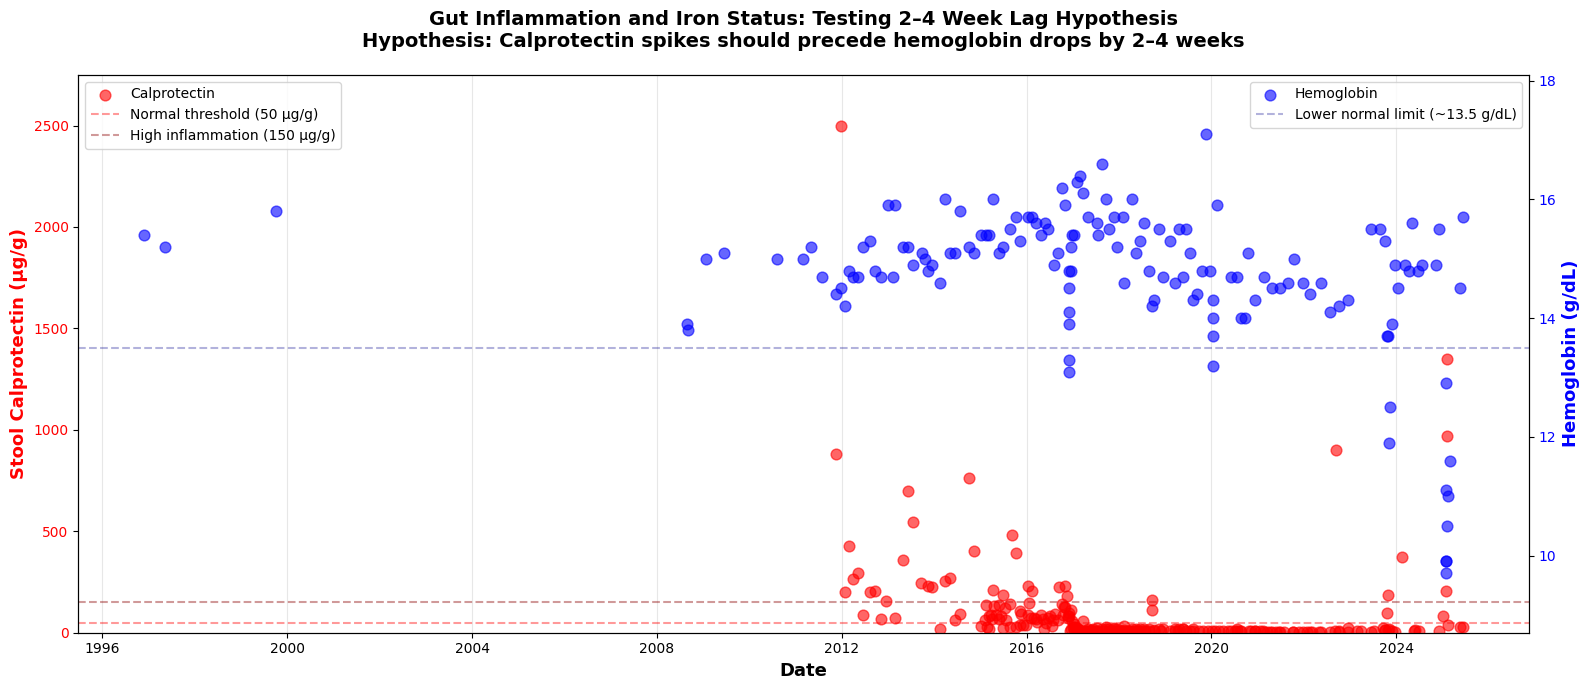


=== KEY OBSERVATIONS FOR YOUR WRITE-UP ===
Calprotectin range: 5.0 – 2500.0 µg/g
Hemoglobin range: 9.7 – 17.1 g/dL
Number of high inflammation events (>150): 35
Severe inflammation events (>500): 8


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and prepare data 
df_long = pd.read_csv('LargeLarryModelers/Data/LLM_Biomarkers_Long.csv')

# Convert Date and Value columns to correct types
df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# 2. Filter data for biomarkers
calprotectin = df_long[df_long['Biomarker'].str.contains('Calprotectin', case=False, na=False)].copy()
hemoglobin = df_long[df_long['Biomarker'].str.contains('HGB', case=False, na=False)].copy()

# Convert to numeric (in case of string leftovers)
calprotectin['Value'] = pd.to_numeric(calprotectin['Value'], errors='coerce')
hemoglobin['Value'] = pd.to_numeric(hemoglobin['Value'], errors='coerce')

# Drop rows missing values
calprotectin = calprotectin.dropna(subset=['Date', 'Value'])
hemoglobin = hemoglobin.dropna(subset=['Date', 'Value'])

# Sort by date
calprotectin = calprotectin.sort_values('Date')
hemoglobin = hemoglobin.sort_values('Date')

# 3. Create figure
fig, ax1 = plt.subplots(figsize=(16, 7))

# Calprotectin 
ax1.scatter(calprotectin['Date'], calprotectin['Value'],
            color='red', alpha=0.6, s=60, label='Calprotectin', zorder=3)
ax1.axhline(y=50, color='red', linestyle='--', alpha=0.4, linewidth=1.5,
            label='Normal threshold (50 µg/g)')
ax1.axhline(y=150, color='darkred', linestyle='--', alpha=0.4, linewidth=1.5,
            label='High inflammation (150 µg/g)')
ax1.set_xlabel('Date', fontsize=13, fontweight='bold')
ax1.set_ylabel('Stool Calprotectin (µg/g)', color='red', fontsize=13, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='red')

# Safe upper limit
if not calprotectin['Value'].empty:
    ax1.set_ylim(0, max(calprotectin['Value']) * 1.1)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3, axis='x')

# Hemoglobin (second y-axis) 
ax2 = ax1.twinx()
ax2.scatter(hemoglobin['Date'], hemoglobin['Value'],
            color='blue', alpha=0.6, s=60, label='Hemoglobin', zorder=3)
ax2.axhline(y=13.5, color='darkblue', linestyle='--', alpha=0.3, linewidth=1.5,
            label='Lower normal limit (~13.5 g/dL)')
ax2.set_ylabel('Hemoglobin (g/dL)', color='blue', fontsize=13, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='blue')

if not hemoglobin['Value'].empty:
    ax2.set_ylim(hemoglobin['Value'].min() - 1, hemoglobin['Value'].max() + 1)
ax2.legend(loc='upper right', fontsize=10)

# Title and layout
plt.title(
    'Gut Inflammation and Iron Status: Testing 2–4 Week Lag Hypothesis\n'
    'Hypothesis: Calprotectin spikes should precede hemoglobin drops by 2–4 weeks',
    fontsize=14, fontweight='bold', pad=20
)

plt.tight_layout()
#plt.savefig('hypothesis_figure.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== KEY OBSERVATIONS FOR YOUR WRITE-UP ===")
if not calprotectin.empty:
    print(f"Calprotectin range: {calprotectin['Value'].min():.1f} – {calprotectin['Value'].max():.1f} µg/g")
if not hemoglobin.empty:
    print(f"Hemoglobin range: {hemoglobin['Value'].min():.1f} – {hemoglobin['Value'].max():.1f} g/dL")

high_cal = len(calprotectin[calprotectin['Value'] > 150])
severe_cal = len(calprotectin[calprotectin['Value'] > 500])

print(f"Number of high inflammation events (>150): {high_cal}")
print(f"Severe inflammation events (>500): {severe_cal}")


In [19]:
from IPython.display import FileLink
FileLink('hypothesis_figure.png')

/home/jovyan/work/hypothesis_figure.png

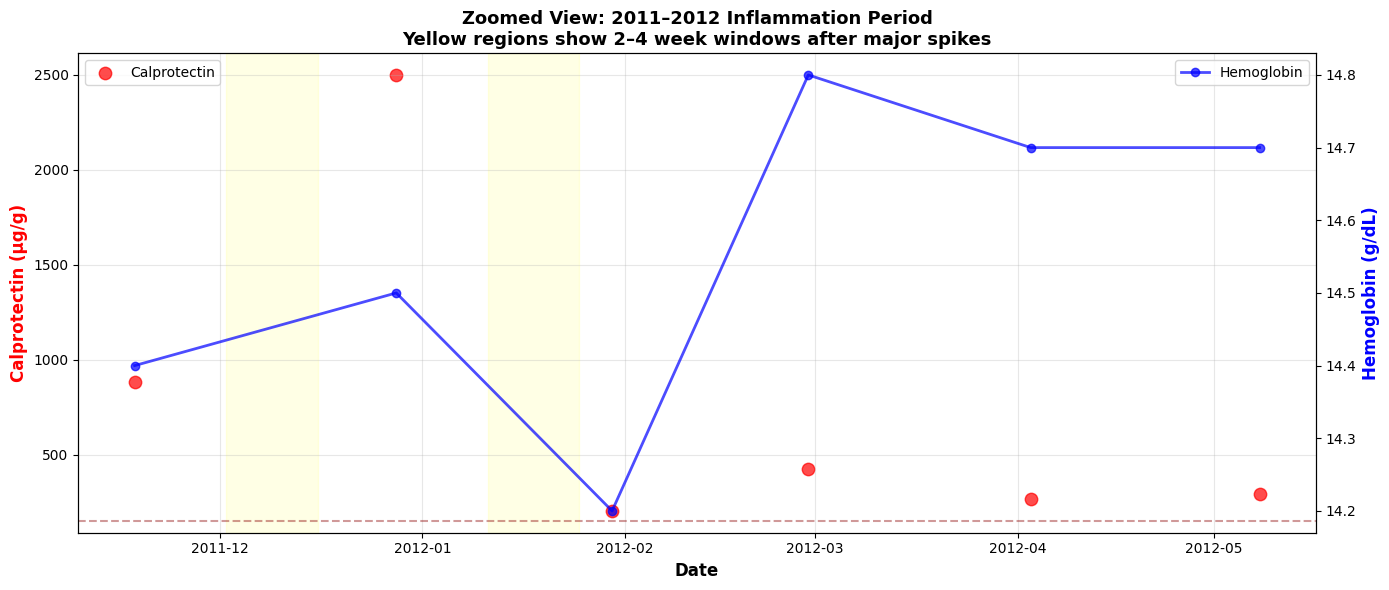

In [23]:
from datetime import timedelta
import matplotlib.pyplot as plt

# Zoom into 2011–2012 period (lots of spikes)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Filter data to specific period
start_date = '2011-11-01'
end_date = '2012-06-01'

calpro_zoom = calprotectin[(calprotectin['Date'] >= start_date) & 
                            (calprotectin['Date'] <= end_date)]
hgb_zoom = hemoglobin[(hemoglobin['Date'] >= start_date) & 
                       (hemoglobin['Date'] <= end_date)]

# Plot with same style as before
ax1.scatter(calpro_zoom['Date'], calpro_zoom['Value'], 
            color='red', alpha=0.7, s=80, label='Calprotectin')
ax1.axhline(y=150, color='darkred', linestyle='--', alpha=0.4)
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Calprotectin (µg/g)', color='red', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(hgb_zoom['Date'], hgb_zoom['Value'], 
         color='blue', marker='o', alpha=0.7, linewidth=2, markersize=6,
         label='Hemoglobin')
ax2.set_ylabel('Hemoglobin (g/dL)', color='blue', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right')

# Add shaded regions for 2–4 week windows after major spikes
major_spikes = calpro_zoom[calpro_zoom['Value'] > 500]
for _, spike in major_spikes.iterrows():
    two_wk = spike['Date'] + timedelta(weeks=2)
    four_wk = spike['Date'] + timedelta(weeks=4)
    ax1.axvspan(two_wk, four_wk, alpha=0.1, color='yellow', 
                label='2–4 week window' if _ == major_spikes.index[0] else '')

plt.title('Zoomed View: 2011–2012 Inflammation Period\n'
          'Yellow regions show 2–4 week windows after major spikes', 
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('zoomed_in_2011_2012.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
from IPython.display import FileLink
FileLink('zoomed_in_2011_2012.png')

/home/jovyan/work/zoomed_in_2011_2012.png